## Public Bike Parking in Dublin City

### *Import mandatory libraries*

In [1]:
# libraries for manipulating data
import pandas as pd
import numpy as np

# libraries for visualising data
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warning messages
import warnings
warnings.filterwarnings("ignore")

#### 2.1 General visualisation

In [2]:
# Re-read firstly saved dataset
bp_final = pd.read_csv("dublin_bike_parking_stands_final.csv")

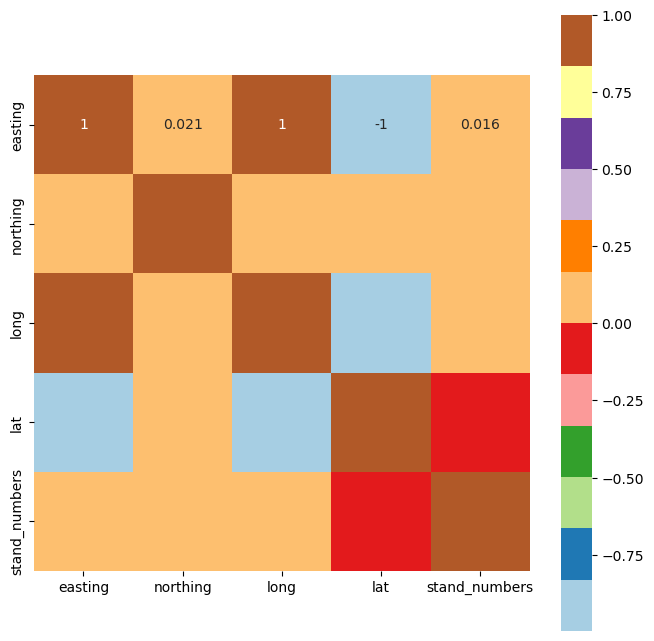

In [6]:
# correlation visually
corrmat = bp_final.corr()
f, ax = plt.subplots(figsize = (8, 8))
fig1 = sns.heatmap(corrmat, vmax = 1, cmap = "Paired", square = True, annot = True);

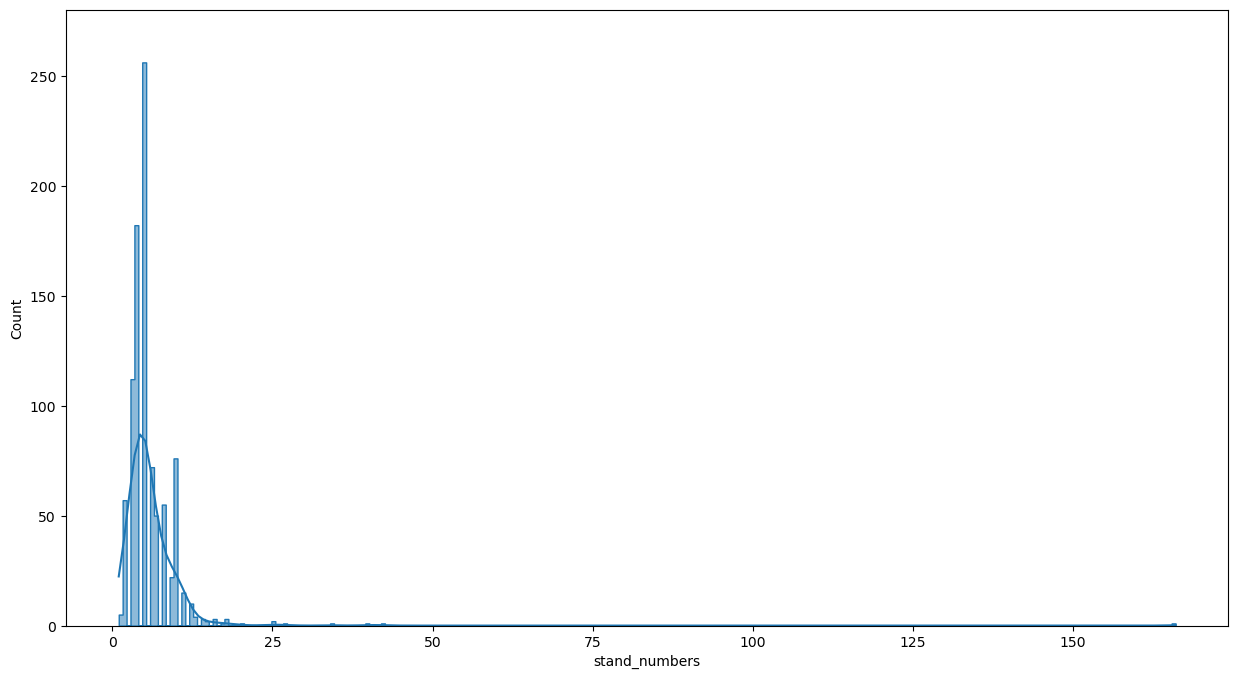

In [8]:
# Plot the count numbers of each type of bike parking stand
f, ax = plt.subplots(figsize = (15, 8))
fig3 = sns.histplot(bp_final["stand_numbers"],
                    kde = True,
                    element = "step")
fig3.axis(ymin = 0, ymax = 280);

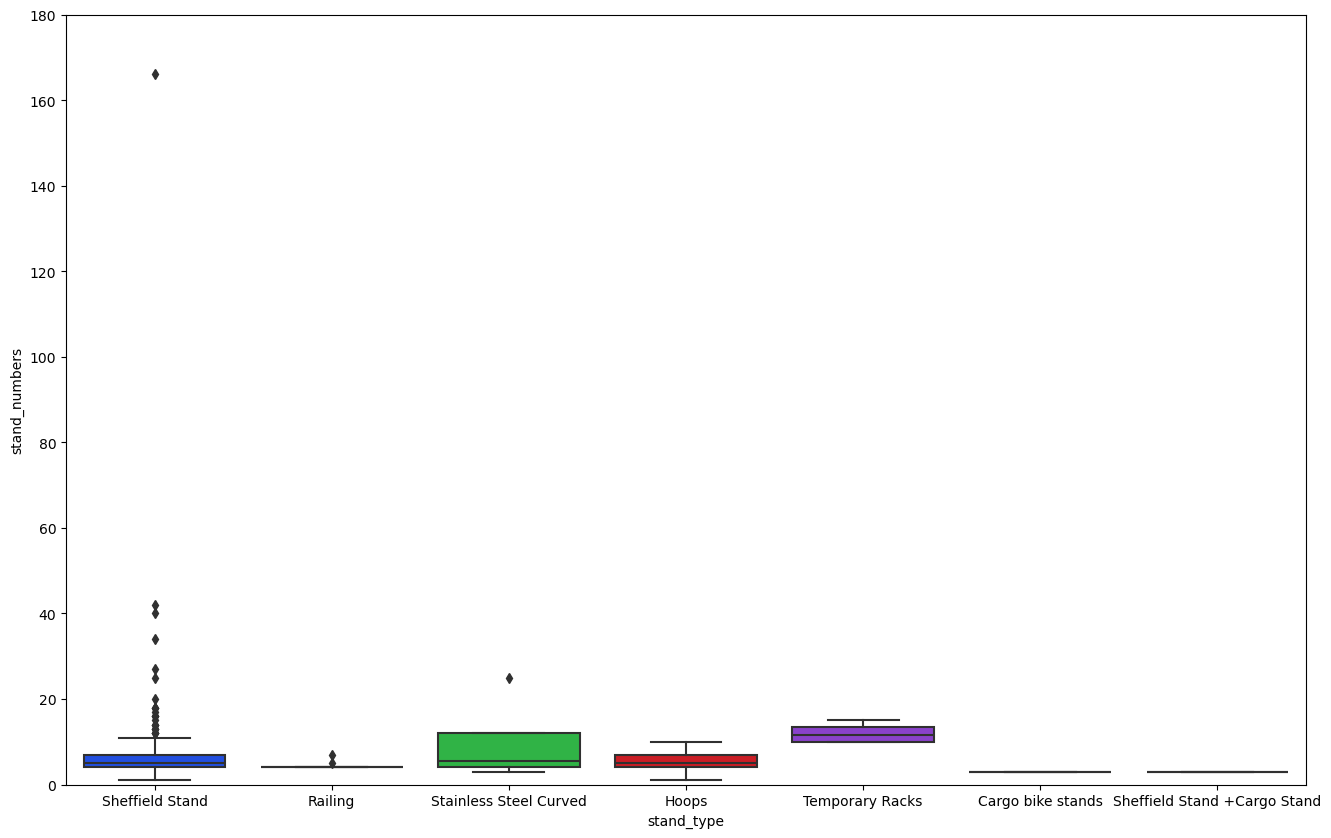

In [9]:
f, ax = plt.subplots(figsize = (16, 10))
fig4 = sns.boxplot(x = "stand_type", y = "stand_numbers", data = bp_final, palette = "bright")
fig4.axis(ymin = 0, ymax = 180);

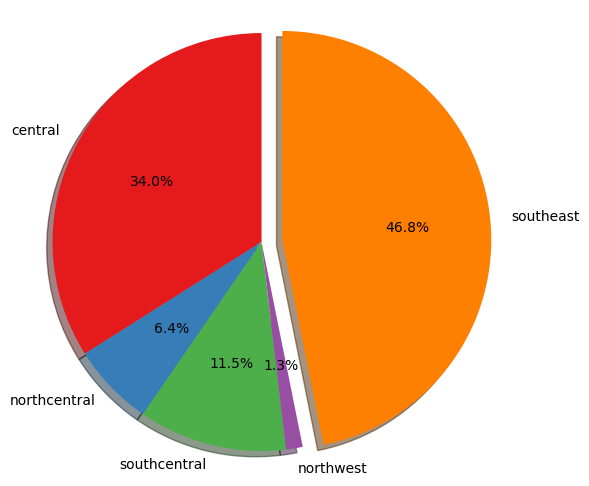

In [11]:
# Create a pie chart based on the value counts in area_geometry
labels = "central", "northcentral", "southcentral", "northwest", "southeast"
sizes = [317, 60, 107, 12, 437]
explode = (0, 0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00"]
f, ax = plt.subplots(figsize = (6, 6))
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%',
        shadow = True, startangle = 90, colors = colors)
ax.axis("equal")
plt.show()

#### 2.3 Interactive visualisation

In [83]:
# Re-read secondly saved dataset which contains location information for interactive visualisation
# This way is more convenient since one of the above cells takes long time to run
bp_final = pd.read_csv("dublin_bike_parking_stands_with_addresses.csv")
bp_final

stand_type     easting    northing      long        lat  \
0    Sheffield Stand  318106.414  234502.185 -6.227256  53.347793   
1    Sheffield Stand  315620.753  232932.916 -6.265134  53.334248   
2    Sheffield Stand  316615.570  234148.652 -6.249761  53.344949   
3    Sheffield Stand  316520.200  234543.281 -6.251047  53.348514   
4    Sheffield Stand  317119.980  233940.217 -6.242268  53.342965   
..               ...         ...         ...       ...        ...   
931  Sheffield Stand  316302.000  233262.000 -6.254792  53.337055   
932  Sheffield Stand  315695.000  238310.000 -6.262055  53.382523   
933  Sheffield Stand  314313.000  234658.000 -6.284133  53.350025   
934  Sheffield Stand  309975.000  233713.000 -6.349573  53.342457   
935  Sheffield Stand  313622.000  233003.000 -6.295098  53.335310   

     stand_numbers                                     geom  \
0                4    53.34779326636702, -6.227255782056404   
1                1   53.334248439303025, -6.265133791780888   
2                2  53.344948684334575, -6.2497608135882246   
3                1    53.34851376066773, -6.251046948776474   
4                3   53.342965466086866, -6.242268049500275   
..             ...                                      ...   
931              4    53.33705477444269, -6.254791959130133   
932             10   53.38252295625358, -6.2620552529215505   
933              4    53.35002515078593, -6.284132854857711   
934              5     53.34245666473957, -6.34957304747032   
935              5    53.335310308902265, -6.29509762018998   

                                        stand_location  
0    North Docklands, North Wall, North Dock B ED, ...  
1    39, Camden Street Lower, Saint Kevin's ED, Dub...  
2    HSE Primary Care Centre, Mark's Lane, Mansion ...  
3    IFSC House, Custom House Quay, North Dock C ED...  
4    Saint Andrew's Resource Centre, 114-116, Pears...  
..                                                 ...  
931  Royal Hibernian Academy, 15, Ely Place Upper, ...  
932  Hampstead Avenue, Whitehall A ED, Dublin, Dubl...  
933  1, Viking Place, Oxmantown, Arran Quay E ED, D...  
934  Church of Assumption, Ballyfermot Road, Ballyf...  
935  Ferrini Youth Club, 387, South Circular Road, ...  

[936 rows x 8 columns]

- **Install folium to embed maps in python for interactive visualisation.**

In [84]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [85]:
# Import the library
import folium

In [86]:
# Caculating the location centre 
location_centre = [bp_final["lat"].mean(), bp_final["long"].mean()]
location_centre

[53.338613111779125, -6.222242507453517]

In [87]:
# Embed openstreetmap (default tiles) onto python, locating the centre, i.e. Dublin city
my_map = folium.Map(location = location_centre, zoom_start = 11)

# Insert plugin that shows coordinate information while moving mouse around the map
from folium.plugins import MousePosition
formatter = "function(num) {return L.Util.formatNum(num, 4) + ' º ';};"
plugin_hover = MousePosition(position = "topright", separator = " | ", prefix = "Latitude|Longitude:", 
                             empty_string = "Mouse Position", lng_first = False, num_digits = 20, 
                             lat_formatter = formatter, lng_formatter = formatter)
my_map.add_child(plugin_hover)

# Display map
my_map

- ***Mark map with the locations of each bike parking stand across Dublin.***

In [88]:
# Plot every bike parking stand to the interactive map, at first glance
for i in range(0, len(bp_final)):
    folium.Marker(
        location = [bp_final.iloc[i]["lat"], bp_final.iloc[i]["long"]]).add_to(my_map)
my_map

In [89]:
# Re-check the 7 types of bike parking stands
bp_final["stand_type"].unique()

array(['Sheffield Stand', 'Railing', 'Stainless Steel Curved', 'Hoops',
       'Temporary Racks', 'Cargo bike stands',
       'Sheffield Stand +Cargo Stand'], dtype=object)

In [90]:
# Create a function to define the colors for each stand type
def select_marker_color(row):
    if row["stand_type"] == "Sheffield Stand":
        return "blue"
    elif row["stand_type"] == "Railing":
        return "red"
    elif row["stand_type"] == "Stainless Steel Curved":
        return "green"
    elif row["stand_type"] == "Hoops":
        return "purple"
    elif row["stand_type"] == "Temporary Racks":
        return "orange"
    elif row["stand_type"] == "Cargo bike stands":
        return "pink"
    else:
        return "beige"

In [91]:
# Apply the colors for improving popups of the Marker function
bp_final["color"] = bp_final.apply(select_marker_color, axis = 1)
bp_final

stand_type     easting    northing      long        lat  \
0    Sheffield Stand  318106.414  234502.185 -6.227256  53.347793   
1    Sheffield Stand  315620.753  232932.916 -6.265134  53.334248   
2    Sheffield Stand  316615.570  234148.652 -6.249761  53.344949   
3    Sheffield Stand  316520.200  234543.281 -6.251047  53.348514   
4    Sheffield Stand  317119.980  233940.217 -6.242268  53.342965   
..               ...         ...         ...       ...        ...   
931  Sheffield Stand  316302.000  233262.000 -6.254792  53.337055   
932  Sheffield Stand  315695.000  238310.000 -6.262055  53.382523   
933  Sheffield Stand  314313.000  234658.000 -6.284133  53.350025   
934  Sheffield Stand  309975.000  233713.000 -6.349573  53.342457   
935  Sheffield Stand  313622.000  233003.000 -6.295098  53.335310   

     stand_numbers                                     geom  \
0                4    53.34779326636702, -6.227255782056404   
1                1   53.334248439303025, -6.265133791780888   
2                2  53.344948684334575, -6.2497608135882246   
3                1    53.34851376066773, -6.251046948776474   
4                3   53.342965466086866, -6.242268049500275   
..             ...                                      ...   
931              4    53.33705477444269, -6.254791959130133   
932             10   53.38252295625358, -6.2620552529215505   
933              4    53.35002515078593, -6.284132854857711   
934              5     53.34245666473957, -6.34957304747032   
935              5    53.335310308902265, -6.29509762018998   

                                        stand_location color  
0    North Docklands, North Wall, North Dock B ED, ...  blue  
1    39, Camden Street Lower, Saint Kevin's ED, Dub...  blue  
2    HSE Primary Care Centre, Mark's Lane, Mansion ...  blue  
3    IFSC House, Custom House Quay, North Dock C ED...  blue  
4    Saint Andrew's Resource Centre, 114-116, Pears...  blue  
..                                                 ...   ...  
931  Royal Hibernian Academy, 15, Ely Place Upper, ...  blue  
932  Hampstead Avenue, Whitehall A ED, Dublin, Dubl...  blue  
933  1, Viking Place, Oxmantown, Arran Quay E ED, D...  blue  
934  Church of Assumption, Ballyfermot Road, Ballyf...  blue  
935  Ferrini Youth Club, 387, South Circular Road, ...  blue  

[936 rows x 9 columns]

In [92]:
# Write this dataset into default filepath (for future reference)

bp_final.to_csv("dublin_bike_parking_stands_mapvisualisation.csv", index = None, header = True)

In [93]:
# Create a function to modify popup box of all the markers
def fancy_html(row):
    i = row
    stand_type = bp_final["stand_type"].iloc[i]
    stand_numbers = bp_final["stand_numbers"].iloc[i]
    address = bp_final["stand_location"].iloc[i]
    
    left_col_colour = "#addd8e"
    right_col_colour = "#f7fcb9"
    html = """<! DOCTYPE html
<html>

<head>
    <table style = "height: 80px; width: 260px;">
<tbody>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #de2d26;">Stand Type</span></td>
<td style="width: 250px;background-color: """+ right_col_colour +""";">{}</td>""".format(stand_type) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #de2d26;">Number of Stands</span></td>
<td style="width: 250px;background-color: """+ right_col_colour +""";">{}</td>""".format(stand_numbers) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #de2d26;">Location</span></td>
<td style="width: 250px;background-color: """+ right_col_colour +""";">{}</td>""".format(address) + """
</tr>
</tbody>
</table>
</html>
"""
    return html

In [94]:
#  Finalise Marker function to display the information we intend to show
import branca
for i in range(0, len(bp_final)):
    html = fancy_html(i)
    iframe = branca.element.IFrame(html = html, width = 280, height = 220)
    popup = folium.Popup(iframe, parse_html = True)
    folium.Marker(
        location = [bp_final.iloc[i]["lat"], bp_final.iloc[i]["long"]],
        popup = popup,
        tooltip = bp_final.iloc[i]["stand_type"],
        icon = folium.Icon(color = bp_final.iloc[i]["color"], icon = "fa-solid fa-bicycle", prefix = "fa")).add_to(my_map)
my_map

In [95]:
# Save map with markers
my_map.save("dublin_bike_parking_stands_marker.html")

- ***Generate circles on map according to the distribution ratios of bike parking stands across Dublin.***

In [96]:
# Initialise a map
my_circlemap = folium.Map(location = location_centre, tiles = "cartodbpositron",zoom_start = 12)

# Creat a sequential color variable
import branca.colormap as cm
colormap = cm.LinearColormap(
    ["yellow", "darkgreen", "red"],
    vmin = bp_final["stand_numbers"].min(),
    vmax = bp_final["stand_numbers"].max(),
    caption = "Number of Stands")

# Create the map
for idx, row in bp_final.iterrows():
    folium.Circle(location = [row["lat"], row["long"]],
                 radius = 4*row["stand_numbers"],
                 color = colormap(row["stand_numbers"]),
                 tooltip = "Number of Stands: " + str(row["stand_numbers"])).add_to(my_circlemap)
my_circlemap.add_child(plugin_hover)
my_circlemap

In [97]:
my_circlemap.save("dublin_bike_parking_stands_circle.html")

- ***Create a heatmap to show the distribution of bike parking stands across Dublin. Similar to Circle function.***

In [98]:
# Create a list of the quantities of bike parking stands in each location
parking_heat = bp_final[["lat", "long", "stand_numbers"]].values.tolist()
parking_heat[0]

[53.34779326636702, -6.227255782056404, 4.0]

In [99]:
# Create a heatmap
import folium.plugins as plugins
my_heatmap = folium.Map(location = location_centre, tiles = "cartodbdark_matter", zoom_start = 12)
plugins.HeatMap(parking_heat).add_to(my_heatmap)
my_heatmap

In [100]:
# Save heatmap
my_heatmap.save("dublin_bike_parking_stands_heatmap.html")

- ***Create a choroplethmap to show the density of bike parking stands across the 5 Local Administrative Areas (North West, North Central, Central, South Central and South East) in Dublin.***

In [101]:
# Display the 5 areas
dublin_5areas

Name                                           geometry
0     NORTH WEST  POLYGON Z ((-6.30628 53.40145 0.00000, -6.3058...
1  NORTH CENTRAL  POLYGON Z ((-6.14532 53.38582 0.00000, -6.1453...
2     SOUTH EAST  POLYGON Z ((-6.27841 53.32989 0.00000, -6.2782...
3  SOUTH CENTRAL  POLYGON Z ((-6.27203 53.34466 0.00000, -6.2720...
4        CENTRAL  POLYGON Z ((-6.29182 53.34741 0.00000, -6.2918...

In [102]:
# Set index
dublin_5areas_index = dublin_5areas.set_index("Name")
dublin_5areas_index

geometry
Name                                                            
NORTH WEST     POLYGON Z ((-6.30628 53.40145 0.00000, -6.3058...
NORTH CENTRAL  POLYGON Z ((-6.14532 53.38582 0.00000, -6.1453...
SOUTH EAST     POLYGON Z ((-6.27841 53.32989 0.00000, -6.2782...
SOUTH CENTRAL  POLYGON Z ((-6.27203 53.34466 0.00000, -6.2720...
CENTRAL        POLYGON Z ((-6.29182 53.34741 0.00000, -6.2918...

In [103]:
# Calculate the areas in squre km
area = round(dublin_5areas_index.geometry.to_crs(epsg = 29902).area/10**6, 1)
area

Name
NORTH WEST       11.0
NORTH CENTRAL    37.0
SOUTH EAST       26.7
SOUTH CENTRAL    16.4
CENTRAL          26.5
dtype: float64

In [104]:
# Check the stand numbers in each area
area_geometry["area"].value_counts()

SOUTH EAST       437
CENTRAL          317
SOUTH CENTRAL    107
NORTH CENTRAL     60
NORTH WEST        12
Name: area, dtype: int64

In [105]:
# Read geojson file
geojson = gpd.read_file("dcc_5committeeareas_2019_2157.geojson")
geojson

Name                                           geometry
0     NORTH WEST  POLYGON Z ((712628.801 740370.193 0.000, 71262...
1  NORTH CENTRAL  POLYGON Z ((723376.597 738898.086 0.000, 72337...
2     SOUTH EAST  POLYGON Z ((714674.273 732453.119 0.000, 71464...
3  SOUTH CENTRAL  POLYGON Z ((715059.495 734107.257 0.000, 71505...
4        CENTRAL  POLYGON Z ((713734.291 734380.708 0.000, 71373...

In [106]:
# Create a geodataframe to show the density of bike parking stands in the 5 committee areas
density = gpd.GeoDataFrame({"name": ["CENTRAL", "NORTH CENTRAL", "SOUTH CENTRAL", "NORTH WEST", "SOUTH EAST"],
                        "stand_numbers": [317, 60, 107, 12, 437], 
                        "area": [26.5, 37.0, 16.4, 11.0, 26.7]})
density["density"] = density["stand_numbers"]/density["area"]
density["geometry"] = geojson["geometry"]
density

name  stand_numbers  area    density  \
0        CENTRAL            317  26.5  11.962264   
1  NORTH CENTRAL             60  37.0   1.621622   
2  SOUTH CENTRAL            107  16.4   6.524390   
3     NORTH WEST             12  11.0   1.090909   
4     SOUTH EAST            437  26.7  16.367041   

                                            geometry  
0  POLYGON Z ((712628.801 740370.193 0.000, 71262...  
1  POLYGON Z ((723376.597 738898.086 0.000, 72337...  
2  POLYGON Z ((714674.273 732453.119 0.000, 71464...  
3  POLYGON Z ((715059.495 734107.257 0.000, 71505...  
4  POLYGON Z ((713734.291 734380.708 0.000, 71373...

In [107]:
# Create a choroplethmap for the density
my_choroplethmap = folium.Map(location = location_centre, tiles = "cartodbpositron", zoom_start = 11)

folium.Choropleth(
    geo_data = geojson,
    data = density,
    fill_color = "YlGnBu",
    name = "mychoropleth",
    columns = ["name", "density"],
    key_on = "feature.properties.Name",
    fill_opacity = 1.0,
    line_opacity = 0.4,
    legend_name = "Density of Bike Parking Stands across Dublin").add_to(my_choroplethmap)

my_choroplethmap.add_child(plugin_hover)
folium.LayerControl().add_to(my_choroplethmap)
my_choroplethmap

In [108]:
# Save map
my_choroplethmap.save("dublin_bike_parking_stands_choroplethmap_density.html")

### References

- <p> https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=7 <p>
- <p> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html?highlight=poisson#scipy.stats.poisson <p>
- <p> https://fontawesome.com/icons/bicycle?s=solid&f=classic <p>
- <p> https://github.com/PacktPublishing/Machine-Learning-with-Real-World-Projects <p>
- <p> https://geopandas.org/en/stable/index.html <p>
- <p> https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/ <p>
- <p> https://matplotlib.org/stable/index.html <p>
- <p> https://pandas.pydata.org/docs/index.html <p>
- <p> https://pyproj4.github.io/pyproj/stable/index.html <p>
- <p> https://python-visualization.github.io/folium/quickstart.html#Getting-Started <p>
- <p> https://scikit-learn.org/stable/ <p>
- <p> https://stackoverflow.com/questions/71287607/how-to-make-a-normal-distribution-graph-from-data-frame-in-python <p>
- <p> https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6 <p>
- <p> https://www.datacamp.com/community/tutorials/introduction-machine-learning-python <p>
- <p> https://www.kaggle.com/code/dabaker/fancy-folium <p>
- <p> Peng, J. et al. (2021) ‘DataPrep.EDA: Task-Centric Exploratory Data Analysis for Statistical Modeling in Python’, in Proceedings of the 2021 International Conference on Management of Data. New York, NY, USA: Association for Computing Machinery (SIGMOD ’21), pp. 2271–2280. Available at: https://doi.org/10.1145/3448016.3457330. <p>